In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
pd.__version__
np.__version__

'1.21.2'

In [115]:
dataset = pd.read_csv('./steam_reviews.csv', header ="infer", index_col=[0])

# Research questions

### [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

#### 1. Let's have a look on data structure by printing first 5 rows

In [7]:
print(dataset.head(20))

    app_id                  app_name  review_id  language  \
0   292030  The Witcher 3: Wild Hunt   85185598  schinese   
1   292030  The Witcher 3: Wild Hunt   85185250  schinese   
2   292030  The Witcher 3: Wild Hunt   85185111  schinese   
3   292030  The Witcher 3: Wild Hunt   85184605   english   
4   292030  The Witcher 3: Wild Hunt   85184287  schinese   
5   292030  The Witcher 3: Wild Hunt   85184171   english   
6   292030  The Witcher 3: Wild Hunt   85184064   english   
7   292030  The Witcher 3: Wild Hunt   85183602   turkish   
8   292030  The Witcher 3: Wild Hunt   85183227  schinese   
9   292030  The Witcher 3: Wild Hunt   85182785   spanish   
10  292030  The Witcher 3: Wild Hunt   85182697  schinese   
11  292030  The Witcher 3: Wild Hunt   85182372   russian   
12  292030  The Witcher 3: Wild Hunt   85182067  schinese   
13  292030  The Witcher 3: Wild Hunt   85181146   russian   
14  292030  The Witcher 3: Wild Hunt   85181114   koreana   
15  292030  The Witcher 

#### 2. Shape

In [8]:
print("Number of reviews (rows):", dataset.shape[0], "\n Number of columns:", dataset.shape[1], "\n Name of columns:", *list(dataset.columns) )

Number of reviews (rows): 21747371 
 Number of columns: 22 
 Name of columns: app_id app_name review_id language review timestamp_created timestamp_updated recommended votes_helpful votes_funny weighted_vote_score comment_count steam_purchase received_for_free written_during_early_access author.steamid author.num_games_owned author.num_reviews author.playtime_forever author.playtime_last_two_weeks author.playtime_at_review author.last_played


#### 3. Columns info 

In [9]:
data = []
for i in range(len(list(dataset.columns))):
    c = list(dataset.columns)[i]
    data.append([c, type(dataset[c][1]), dataset[c].nunique(), dataset.shape[0] - dataset[c].count()])
df = pd.DataFrame(data=data, columns=["column", "type_val", "unique_count", "None_count"])
print(df)

                            column                 type_val  unique_count  \
0                           app_id    <class 'numpy.int64'>           315   
1                         app_name            <class 'str'>           315   
2                        review_id    <class 'numpy.int64'>      21612444   
3                         language            <class 'str'>            28   
4                           review            <class 'str'>      16657837   
5                timestamp_created    <class 'numpy.int64'>      18932372   
6                timestamp_updated    <class 'numpy.int64'>      18739831   
7                      recommended    <class 'numpy.bool_'>             2   
8                    votes_helpful    <class 'numpy.int64'>          2716   
9                      votes_funny    <class 'numpy.int64'>          2215   
10             weighted_vote_score  <class 'numpy.float64'>       1304322   
11                   comment_count    <class 'numpy.int64'>           351   

#### As we see:
1. The only columns that have None values are "review" and "author.playtime_at_review" and "author.last_played"
2. There are 21747371 unique id_reviews, 9 app_ids and app_names, in 28 different languages

### [RQ2] Let's explore the dataset by finding simple insights into the reviews.

1. Plot the number of reviews for each application in descending order.
2. What applications have the best Weighted Vote Score?
3. Which applications have the most and the least recommendations?
4. How many of these applications were purchased, and how many were given for free?

#### 1. Plot the number of reviews for each application in descending order.

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS      1644255
Grand Theft Auto V                 1019116
Tom Clancy's Rainbow Six Siege      841918
Terraria                            672815
Garry's Mod                         655524
                                    ...   
Don't Escape: 4 Days to Survive       1013
Shadow Complex Remastered              700
Out of the Park Baseball 19            700
DRAGON QUEST HEROES™ II                600
Neon Hardcorps                         200
Name: review_id, Length: 315, dtype: int64


<AxesSubplot:ylabel='Frequency'>

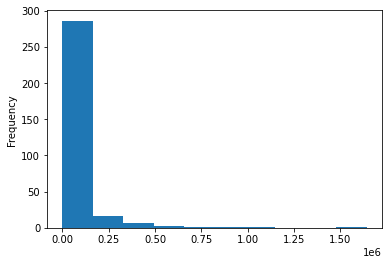

In [10]:
c=dataset.groupby(['app_name']).review_id.count().sort_values(ascending=False)
print(c)
c.plot(kind='hist')

In [11]:
print(f'The most reviewed game on steam is:', dataset.groupby(['app_name']).review_id.count().idxmax(), "the least reviewed is: ", dataset.groupby(['app_name']).review_id.count().idxmin())

The most reviewed game on steam is: PLAYERUNKNOWN'S BATTLEGROUNDS the least reviewed is:  Neon Hardcorps


#### 2. The applications that have the best Weighted Vote Score:

In [14]:
print(dataset.groupby(['app_name'])['weighted_vote_score'].mean().sort_values(ascending=False))

app_name
Hunt Down The Freeman                0.502150
Urban Empire                         0.438623
METAL GEAR SURVIVE                   0.421632
Identity                             0.415384
Umbrella Corps                       0.414678
                                       ...   
There Is No Game: Wrong Dimension    0.086053
Bloons TD 6                          0.084871
People Playground                    0.083486
Among Us                             0.078234
Totally Accurate Battle Simulator    0.076889
Name: weighted_vote_score, Length: 315, dtype: float64


This is mean of weighted vote score for each application

In [15]:
print(f'The 1-st application that have the best Weighted Vote Score is:', dataset.groupby(['app_name'])['weighted_vote_score'].mean().idxmax())

The 1-st application that have the best Weighted Vote Score is: Hunt Down The Freeman


#### 3. The applications that have the most and the least recommendations:

In [16]:
most=dataset[dataset.recommended==True].groupby(['app_name']).recommended.value_counts().idxmax()[0]
least=dataset[dataset.recommended==True].groupby(['app_name']).recommended.value_counts().idxmin()[0]
print('The applications that have the most and the least recommendations are respectively', most, 'and', least)

The applications that have the most and the least recommendations are respectively PLAYERUNKNOWN'S BATTLEGROUNDS and Neon Hardcorps


#### 4. How many of these applications were purchased, and how many were given for free?

In [17]:
dataset[dataset.steam_purchase==True].groupby(['app_name']).steam_purchase.value_counts()

app_name                               steam_purchase
20XX                                   True                3204
A Hat in Time                          True               27262
A Short Hike                           True                4566
A Way Out                              True                7416
ARK: Survival Evolved                  True              316015
                                                          ...  
XCOM 2                                 True               42215
Yakuza 0                               True               24643
Youtubers Life                         True               11437
theHunter: Call of the Wild™           True               55784
三国群英传8 Heroes of the Three Kingdoms 8  True                7031
Name: steam_purchase, Length: 313, dtype: int64

For each application how many times has been purchased

In [18]:
dataset[dataset.received_for_free==True].groupby(['app_name']).received_for_free.value_counts()

app_name                               received_for_free
20XX                                   True                    51
A Hat in Time                          True                   820
A Short Hike                           True                    99
A Way Out                              True                   296
ARK: Survival Evolved                  True                 12046
                                                            ...  
XCOM 2                                 True                  1254
Yakuza 0                               True                   466
Youtubers Life                         True                   544
theHunter: Call of the Wild™           True                  2163
三国群英传8 Heroes of the Three Kingdoms 8  True                    65
Name: received_for_free, Length: 315, dtype: int64

For each application how many times has been received for free

### [RQ3] Now it's important to understand the preferred time to do reviews.

1. What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
2. Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
3. Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

    Initial time | Final time
    ------------ |:----------:
    06:00:00     |  10:59:59
    11:00:00     |  13:59:59
    14:00:00     |  16:59:59
    17:00:00     |  19:59:59
    20:00:00     |  23:59:59
    00:00:00     |  02:59:59
    03:00:00     |  05:59:59


In [19]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [20]:
dataset1 = pd.read_csv('./steam_reviews.csv', parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], date_parser=dateparse)
#converted the dataset columns into datetime

In [21]:
dataset1['initial_time'] = dataset1['timestamp_created'].dt.time
dataset1['Hours'] = dataset1['timestamp_created'].dt.hour
dataset1['num_reviews'] = dataset1['author.num_reviews']
#since timestamp_created/updated columns contain date and time, we have separated time from it.

#### 1. What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [22]:
dataset1.groupby(['initial_time']).timestamp_created.count().sort_values(ascending=False).head(1)

initial_time
15:54:53    583
Name: timestamp_created, dtype: int64

#### Hence, authors usually writes at 15:54

#### 2. Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [23]:
g = dataset1.groupby(['Hours']).count()
group = dataset1.groupby(['Hours']).sum()

In [24]:
g1 = g['Unnamed: 0']* group['num_reviews']
#creating a new daxtaset for hours and counts
g1.reset_index().to_csv('rq3.csv',index=False)

In [25]:
#Reading the dataset and renaming the column
dataset2 = pd.read_csv('./rq3.csv')
dataset2 = dataset2.rename(columns={'0':'Counts'})

In [27]:
#Appending Hours and Counts column to a single list
a = list(dataset2['Hours'])
b = list(dataset2['Counts'])
c = []
for i in range(len(a)):
    c.append([a[i],b[i]])

#### Implementation of Function

In [28]:
def param_list(intervals):

    m =[]
    for i in range(len(intervals)-1):
        s =0
        if intervals[i] < intervals[i+1]:
            for j in range(intervals[i],intervals[i+1]):
                s += c[j][1]
            m.append(s)
        else:
            j +=1
            k =j
            while k <24:
                k +=1
                s += c[j][1]
                j+=1
            m.append(s)
    print("Number of reviews between intervals respectively: ",m)
    
    return plt.bar(intervals[:-1],m)

#### 3. Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

    Initial time | Final time
    ------------ | ----------
    06:00:00     |  10:59:59
    11:00:00     |  13:59:59
    14:00:00     |  16:59:59
    17:00:00     |  19:59:59
    20:00:00     |  23:59:59
    00:00:00     |  02:59:59
    03:00:00     |  05:59:59

In [29]:
inter= ["06:00:00 - 10:59:59", "11:00:00 - 13:59:59", "14:00:00 - 16:59:59", "17:00:00 - 19:59:59", "20:00:00 - 23:59:59", "00:00:00 - 02:59:59", "03:00:00 - 05:59:59"]

Number of reviews between intervals respectively:  [31587065230767.0, 29095612153636.0, 38778499336189.0, 38060241989483.0, 8.672057014306884e+18, 19979705061581.0, 17673935742511.0]


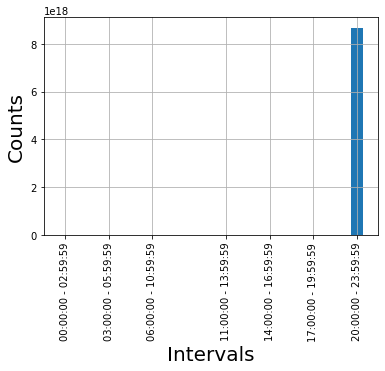

In [30]:
intervals = [6,11,14,17,20,0,3,6]
plt.xticks(intervals[:-1],inter, rotation = 'vertical')
plt.xlabel('Intervals',size = 20)
plt.ylabel('Counts', size = 20)
plt.grid()
param_list(intervals)
plt.show()

### [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

1. What are the top 3 languages used to review applications?
2. Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
3. Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
4. Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

#### 1.What are the top 3 languages used to review applications?
Answ: engl,schinese,russ

In [12]:
lang = dataset["language"].to_numpy() #array with languages
unique, counts = np.unique(lang, return_counts=True)
ind = (np.argsort(counts))[-3:] 
for i in range (3):
    print(f'The {i}-st popular language:', unique[ind[2-i]])

The 0-st popular language: english
The 1-st popular language: schinese
The 2-st popular language: russian


#### 2. Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [13]:
def lang_filter(dataset, lang):
    return dataset.loc[dataset['language'].isin(lang)]

#### 3. Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [14]:
top_lang = [unique[ind[2-i]] for i in range(3)] #top 3 language, using code for 1st question
dataset_top = lang_filter(dataset, lang) #dataset whith reviews in one of three top languages
dataset_top_funny = dataset.loc[dataset['votes_funny'] > 0] ##dataset whith reviews in one
                                                            ##of three top languages, which were voted funny
funny_perc = 100*dataset_top_funny.shape[0]/dataset_top.shape[0]
print("Percentage of these reviews (associated with the top 3 languages) were voted as funny:", funny_perc,"%")

Percentage of these reviews (associated with the top 3 languages) were voted as funny: 11.96959393390585 %


#### 4. Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [15]:
dataset_top_help = dataset.loc[dataset['votes_helpful'] > 0] ##dataset whith reviews in one
                                                            ##of three top languages, which were voted funny
funny_perc = 100*dataset_top_help.shape[0]/dataset_top.shape[0]
print("Percentage of these reviews (associated with the top 3 languages) were voted as helpful:", funny_perc,"%")

Percentage of these reviews (associated with the top 3 languages) were voted as helpful: 28.073480697965746 %


### [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

1. Plot the top 10 most popular reviewers and the number of reviews.
2. What applications did the most popular author review?
3. How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
4. How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

#### 1. Plot the top 10 most popular reviewers and the number of reviews.

In [31]:
a=dataset.groupby(['author.steamid']).review_id.count().sort_values(ascending=False)
print(a[:10])

author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
Name: review_id, dtype: int64


In [32]:
print("These are the players who have carried out most reviews, the most popular reviewer made ",a[:10].max(), "the tenth most popular made",a[:10].min())

These are the players who have carried out most reviews, the most popular reviewer made  149 the tenth most popular made 86


#### 2. What applications did the most popular author review?

In [33]:
author_pop=dataset.groupby(['author.steamid']).review_id.count().idxmax()
app=dataset.loc[dataset['author.steamid']==author_pop ,['app_name']]
print('The applications that the most popular author review are: ', *app["app_name"].tolist())

The applications that the most popular author review are:  Half-Life Counter-Strike: Source Half-Life 2: Episode Two Portal 2 Garry's Mod Sid Meier's Civilization V Dead by Daylight Sid Meier's Civilization VI Subnautica Human: Fall Flat Banished Celeste Getting Over It with Bennett Foddy A Hat in Time The Forest Axiom Verge The Binding of Isaac: Rebirth To the Moon Cave Story+ Titan Souls Super Meat Boy Don't Escape: 4 Days to Survive Volgarr the Viking Enter the Gungeon Salt and Sanctuary Hollow Knight The End Is Nigh Factorio RimWorld Insurgency: Sandstorm Euro Truck Simulator 2 Foundation Kenshi Into the Breach Warhammer: Vermintide 2 DOOM Eternal Age of Empires: Definitive Edition Void Bastards Stardew Valley Among Us Blackwake Little Nightmares Bomber Crew Rust HITMAN™ 2 Phasmophobia Mount & Blade: Warband Resident Evil 2 Slime Rancher Hotline Miami Tomb Raider BattleBlock Theater Dishonored South Park™: The Stick of Truth™ Undertale Don't Starve Rocket League Dead Cells Broforce

#### 3. How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage

In [34]:
pur=dataset.loc[(dataset['author.steamid']==author_pop) & (dataset.steam_purchase==True),['app_name']]
print('The applications he bought are:',pur["app_name"].count(),",in percent:",(pur["app_name"].count()/app["app_name"].count())*100,"%")
free=dataset.loc[(dataset['author.steamid']==author_pop) & (dataset.received_for_free==True),['app_name']]
print('The applications he received for free are:',free["app_name"].count(),",in percent:",(free["app_name"].count()/app["app_name"].count())*100,"%")

The applications he bought are: 110 ,in percent: 73.8255033557047 %
The applications he received for free are: 4 ,in percent: 2.684563758389262 %


#### 4. How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [35]:
pur_pos= dataset.loc[(dataset['author.steamid']==author_pop) & (dataset.steam_purchase==True) & (dataset.recommended==True)]
print("the applications that he bought and reviewed positively are:", pur_pos["app_name"].count())
pur_neg= dataset.loc[(dataset['author.steamid']==author_pop) & (dataset.steam_purchase==True) & (dataset.recommended==False)]
print("the applications that he bought and reviewed negatively are:", pur_neg["app_name"].count())
free_pos= dataset.loc[(dataset['author.steamid']==author_pop) & (dataset.received_for_free==True) & (dataset.recommended==True)]
print("the applications that he received for free and reviewed positevely are:", free_pos["app_name"].count())
free_neg= dataset.loc[(dataset['author.steamid']==author_pop) & (dataset.received_for_free==True) & (dataset.recommended==False)]
print("the applications that he received for free and reviewed nagatively are:", free_neg["app_name"].count())

the applications that he bought and reviewed positively are: 108
the applications that he bought and reviewed negatively are: 2
the applications that he received for free and reviewed positevely are: 4
the applications that he received for free and reviewed nagatively are: 0


### [RQ6] It's time to get information from the updates that a user does to his reviews.

1. What is the average time (days and minutes) a user lets pass before he updates a review?
2. Plot the top 3 authors that usually update their reviews.

#### 1. What is the average time (days and minutes) a user lets pass before he updates a review?

In [116]:
dataset1['time_diff'] = dataset1['timestamp_updated'] - dataset1['timestamp_created']

In [117]:
#Taking mean (TimeDelta)
time = dataset1['time_diff'].mean()

In [119]:
print ("Average time user lets pass before he updates a review is: ", time )

Average time user lets pass before he updates a review is:  2542174.759092895


#### 2. Plot the top 3 authors that usually update their reviews.

In [120]:
dataset1.groupby(['time_diff','author.steamid']).nunique().head(3)

app_id  app_name  review_id  language  review  \
time_diff author.steamid                                                     
-4        76561198331063747       1         1          1         1       1   
 0        76561197960266130       1         1          1         1       1   
          76561197960266945       2         2          2         1       2   

                             timestamp_created  timestamp_updated  \
time_diff author.steamid                                            
-4        76561198331063747                  1                  1   
 0        76561197960266130                  1                  1   
          76561197960266945                  2                  2   

                             recommended  votes_helpful  votes_funny  ...  \
time_diff author.steamid                                              ...   
-4        76561198331063747            1              1            1  ...   
 0        76561197960266130            1              1            1  ...   
          76561197960266945            2              2            1  ...   

                             comment_count  steam_purchase  received_for_free  \
time_diff author.steamid                                                        
-4        76561198331063747              1               1                  1   
 0        76561197960266130              1               1                  1   
          76561197960266945              1               1                  1   

                             written_during_early_access  \
time_diff author.steamid                                   
-4        76561198331063747                            1   
 0        76561197960266130                            1   
          76561197960266945                            1   

                             author.num_games_owned  author.num_reviews  \
time_diff author.steamid                                                  
-4        76561198331063747                       1                   1   
 0        76561197960266130                       1                   1   
          76561197960266945                       1                   1   

                             author.playtime_forever  \
time_diff author.steamid                               
-4        76561198331063747                        1   
 0        76561197960266130                        1   
          76561197960266945                        2   

                             author.playtime_last_two_weeks  \
time_diff author.steamid                                      
-4        76561198331063747                               1   
 0        76561197960266130                               1   
          76561197960266945                               1   

                             author.playtime_at_review  author.last_played  
time_diff author.steamid                                                    
-4        76561198331063747                          1                   1  
 0        76561197960266130                          1                   1  
          76561197960266945                          2                   2  

[3 rows x 21 columns]

In [123]:
g2 = pd.DataFrame(dataset1, columns = ['timestamp_created','timestamp_updated','author.steamid','time_diff'])

#reading the dataset
dataset3 = g2.reset_index()
dataset4 = dataset3[~(dataset3[dataset3.columns[3:]] == '0 days 00:00:00').any(axis=1)]
print(dataset4['author.steamid'].value_counts())

76561198192166873    107
76561198239163744    106
76561198013146396     98
76561198027973295     96
76561198032476027     84
                    ... 
76561198985167727      1
76561198824586536      1
76561198984398889      1
76561198825103748      1
76561198259866806      1
Name: author.steamid, Length: 3772053, dtype: int64


### [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

1. What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
2. What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
3. Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

#### 1. What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [49]:
num_wvs_0_5 = dataset.loc[dataset['weighted_vote_score'] >= 0.5,['weighted_vote_score']].shape[0]
num_wvs_tot = dataset['weighted_vote_score'].shape[0]
pa= num_wvs_0_5/num_wvs_tot
print("The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is:", round(pa, 2))

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is: 0.22


#### 2. What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [50]:
num_funny_O_5 = dataset.loc[(dataset['weighted_vote_score'] >= 0.5) & (dataset["votes_funny"]>=1),["review_id"]].shape[0]
p = round((num_funny_O_5/num_wvs_0_5),2)
print("the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is:", p)

the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is: 0.25


#### 3. Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [58]:
#p(a inters b) is p(a) * p(b) if and only if a and b is independent
#p(a inters b) is num_funny_O_5, p(a) is pa, p(b) is : 
pb = dataset.loc[dataset["votes_funny"]>=1].shape[0]/num_wvs_tot
p_inters = num_funny_O_5/num_wvs_tot
print("the probability that “a review has at least one vote as funny” is independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”:", p==pa*pb)

the probability that “a review has at least one vote as funny” is independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”: False


### [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

1. Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
2. Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.
3. Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.
4. What are histograms, bar plots, scatterplots and pie charts used for?
5. What insights can you extract from a Box Plot?

In [62]:
dataset1 = dataset.loc[(dataset['language'] == "russian") | (dataset['language'] == "schinese")]
w_russ = dataset.loc[dataset['language'] == "russian"]['weighted_vote_score'].to_numpy()
w_ch = dataset.loc[dataset['language'] == "schinese"]['weighted_vote_score'].to_numpy()

#### 5. What insights can you extract from a Box Plot?
Let's draw boxplot to learn a spread of data with weighted vote scores of russian and chinese reviews (it's will be useful for quest1)

<AxesSubplot:title={'center':'weighted_vote_score'}, xlabel='language'>

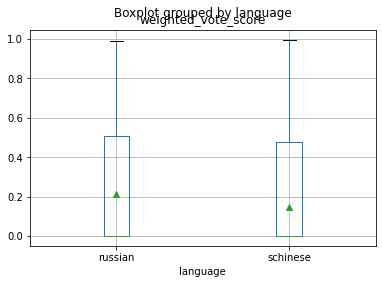

In [21]:
dataset1.boxplot(column='weighted_vote_score', by='language', showmeans=True)

From boxplot we see that russian weight scores and chineese scores spread alike. Also we see differences between their means, mean of russian weight scores are a little bit higher.

#### 4. What are histograms, bar plots, scatterplots and pie charts used for?
All these tools are used to learn more about data, its spread and distribution. Using it we can explore data and find more appropriate statistical test for a task.

Bar plots are used when we compare quantity of objects for different categories in our data. From it we can see which categories are more common, and which are less.

Pie chart can be used instead of bar plot if observed categories are subparts of the whole (all data divides into these categories(subgroups)). It's make it's more visible to understand what part of the whole data each subgroup contains.

Histograms are alike bars, but not only for numeric values, but are more suitable for continuos. For example, we can use histogram to understand if data distrubuted close to normal distribution or not. It can be useful for finding appropriate statistic tests too.
Let's do this for our data of weighted vote scores of russian and chinese reviews (we will need it for q1).


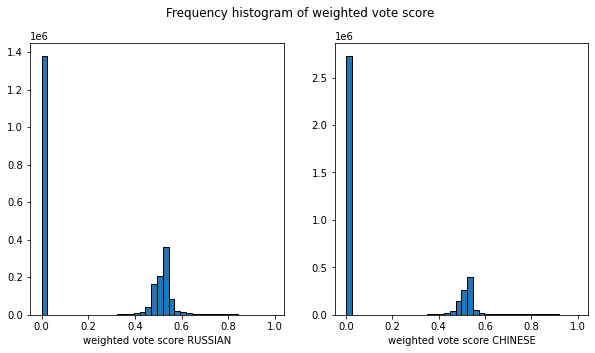

In [88]:
# plot histogram
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.suptitle("Frequency histogram of weighted vote score")
ax1.hist(w_russ , bins=40, histtype='bar', ec='k') 
ax2.hist(w_ch, bins=40, histtype='bar', ec='k') 
ax1.set_xlabel("weighted vote score RUSSIAN")
ax2.set_xlabel("weighted vote score CHINESE")
plt.show()

From this histograms we can suggest that data of weighted vote scores of russians and data of weighted vote scores of schinese distributed close to laplace distribution if we exclude all zero values. Let's exclude zero values from this two samples to be able to compare them better using histograms.

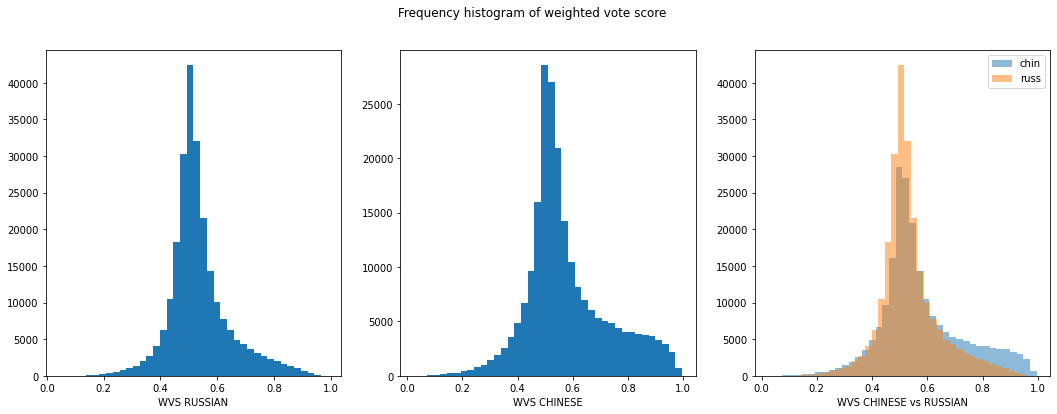

In [90]:
w_ch_1 = np.setdiff1d(w_ch,0)
w_russ_1 = np.setdiff1d(w_russ,0)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 6)
fig.suptitle("Frequency histogram of weighted vote score")
ax1.hist(w_russ_1 , bins=40, histtype='bar') 
ax2.hist(w_ch_1, bins=40, histtype='bar') 
ax3.hist(w_ch_1, bins=40, histtype='bar',alpha=0.5, label = "chin")
ax3.hist(w_russ_1, bins=40, histtype='bar', alpha=0.5, label = 'russ')
ax1.set_xlabel("WVS RUSSIAN")
ax2.set_xlabel("WVS CHINESE")
ax3.set_xlabel("WVS CHINESE vs RUSSIAN")
ax3.legend(loc='upper right')
plt.show()

Now it looks like laplace distibuted samples

#### 1.Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice. 



As we see from histograms above non-zero values of both samples are close to laplace distribution.

In [65]:
#Let's compare means, median, and vars of two samples:
print("Chinese weighted score average:", round(np.mean(w_ch),2), "+-", round(np.var(w_ch), 2), "median:", round(np.median (w_ch), 2))
print("Russian weighted score average:", round(np.mean(w_russ),2), "+-", round(np.var(w_russ), 2), "median:", round(np.median (w_ch), 2))
#And compare means, median, and vars of same two samples but without zero values:
print("Chinese weighted score average (non-zero):", round(np.mean(w_ch_1),2), "+-", round(np.var(w_ch_1), 2), "median:", round(np.median (w_ch_1), 2))
print("Russian weighted score average (non-zero):", round(np.mean(w_russ_1),2), "+-", round(np.var(w_russ_1), 2), "median:", round(np.median (w_ch_1), 2))


Chinese weighted score average: 0.15 +- 0.06 median: 0.0
Russian weighted score average: 0.21 +- 0.07 median: 0.0
Chinese weighted score average (non-zero): 0.58 +- 0.02 median: 0.54
Russian weighted score average (non-zero): 0.54 +- 0.01 median: 0.54


As we see from above and from boxplot(quest5) mean of two samples are close to each other

In [77]:
#As we see there are a lot of zero values in both samples, let's compare how much:
print("Total number of chinese scores:", len(w_ch), "with", (np.count_nonzero(w_ch==0)) , "zero values", "and ", np.count_nonzero(w_ch!=0), "non-zero values")
print("Total number of russ scores:", len(w_russ), "with", (np.count_nonzero(w_russ==0)) , "zero values", "and ", np.count_nonzero(w_russ!=0), "non-zero values") 
      

Total number of chinese scores: 3764967 with 2727273 zero values and  1037694 non-zero values
Total number of russ scores: 2348900 with 1380554 zero values and  968346 non-zero values


We see that sample of chinese scores is larger than russ scores, but have appr two times more zero values. The number of non zero values in both samples are appr the same.

In [79]:
#Interesting, but T-student independent test and Mannwhitney tests didn't wotk for this dataset, mb becouse of size of samples:
stats.mannwhitneyu(x=w_ch_1[:968346], y=w_russ_1[:968346], alternative = 'two-sided')

MannwhitneyuResult(statistic=30987851217.0, pvalue=0.0)

Conclusion: there are no significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian. For both russ and chin non-zero weighted scores appr have lapplace distribution

#### 2. Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

In [ ]:
import seaborn as sn
data = {"time diff": (dataset["timestamp_updated"] - dataset["timestamp_created"]),
"wvs": dataset["weighted_vote_score"] }
df = pd.DataFrame(data)

Let's use scatter plot to understand relationship between two features

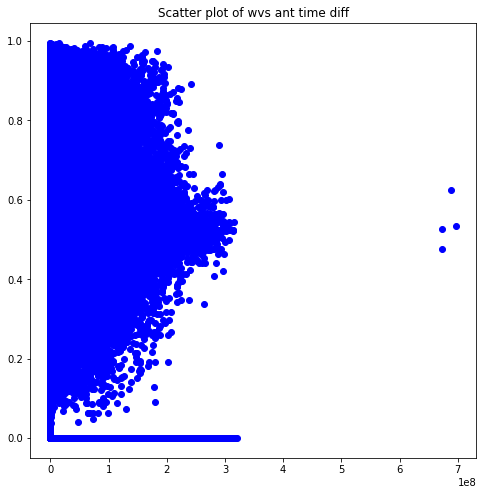

In [108]:
fig, ax = plt.subplots()

ax.scatter(df["time diff"], df["wvs"],
           c = 'blue')        
ax.set_title('Scatter plot of wvs ant time diff')     
fig.set_figwidth(8)     
fig.set_figheight(8)    
plt.show()

Let's see if time passed before update and wvs are correlated features

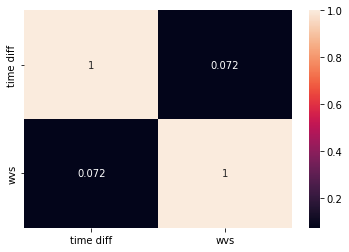

In [104]:
#Correlation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Let's also use Pearson test to check correlation

In [113]:
import scipy.stats
scipy.stats.pearsonr(df["time diff"][:1000], df["wvs"][:1000]) 

(0.06085355369766621, 0.05438786503592002)

Here we see that pvalue is small, and absolute of correlation coeff are very close to zero. So we can come to the conclusion that there is no significant relationship between time and wvs.

### Bonus points
For this homework, you are required to work with all data in the steam_reviews.csv. An extension (two files) of the dataset is available in the next links:

a. File 1 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_1.zip.

b. File 2 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_2.zip.

It is not necessary to use the extension for this homework, however, if you decide to use it, we will take it into account in the final evaluation. In summary, to get the bonus points you are required to work with [steam_reviews.csv + two files of extension] all together.

# Theoretical Questions

### [TQ1] We are given the following algorithm.

        Input:
            A: array of length n
            k: integers between 1 and n

        function alg(A, k):
          s <-- a random element of A
          set L = [all the elements of A with value <= s]
          set R = [all the elements of A with value > s]
          r = len(L)
          if k == r:
            return s
          else if k < r:  
            return alg(L, k)
          else:
            return alg(R, k - r) 

    
1. What does the algorithm compute?
2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?
3. What is asymptotically the running time of the algorithm in the best case?

#### 1. What does the algorithm compute?

This is a recursive algorithm. Takes as input an array $A$ (length $n$) and an integer $k$ ($0\leq k\leq n$). This algorithm returns $s$, that is the number that tells us that the number of elements in the array is $k$ (which corresponds at the maximum at $s$) 

#### 2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

In the worst case the length of the array decreases by one each time the function is called (by itself) and so the function is runned $n$ times: $T(n)=\sum_{i=1}^n (a_i+b) = a \frac {n(n+1)}{2}+nb$

#### Answer: At worst the running time of the algorithm is $O(n^2)$ 

#### 3. What is asymptotically the running time of the algorithm in the best case?

In the best case (at the first iteration the number of elements of the array $L$ is equal to $k$), the running time is in the order of $n$.
#### Answer: At best the running time of the algorithm is $\omega(n)$ 

### [TQ2] You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

        function splitSwap(a, l, n):
          if n <= 1:
            return
          splitSwap(a, l, n/2)
          splitSwap(a, l+ n /2, n/2)
          swapList(a, l, n)
##### The subroutine swapList is described here:

        function swapList(a, l, n):
          for i = 0 to n/2:
            tmp = a[l + i]
            a[l + i] = a[l + n/2 + i]
            a[l + n/2 + i] = tmp
1. How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)
2. What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

HINT: Consider the scenario where len(a) and n are numbers that are a power of 2.

#### 1.How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)
Lets T(n) be a complexity of splitSwap (it does not depen of l and l as  swapList doesn't depend on it). Complexity of swapList is O(n), as it makes three constatant time operations n/2 times.
Let's consider $n = 2^k$.
Complexity of splitSwap:
$$T(2^k) = T(2^{k-1})+T(2^{k-1})+ O(2^k) = O(2^k) + 4*T(2^{k-2})+ 2*O(2^{k-1})= \underbrace{\sum_{t=1}^{i-1} 2^{t-1}*O(2^{k-
t+1})}_{\text{adds from previos layers}} + 2^{i}*T(2^{k-i}) + 2^{i-1}*O(2^{k-i+1}),$$ for $1 < i<= k$
For i = k:
$$T(2^k) = \sum_{t=1}^{k-1} 2^{t-1}*O(2^{k-t+1}) + 2^{k}*\underbrace{T(2^{k-k})}_{T(2) = O(1)} + 2^{k-1}*O(2^{k-k+1}) =   \sum_{t=1}^{k} 2^{t-1}*O(2^{k-t+1}) + O(2^k)  = \sum_{t=1}^{k} O(2^k) + O(2^k) = O((k+1)*2^k) = O(\log n *n)$$
#### Answer: Complexity is $O(\log n * n)$

#### 2.What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

##### Answer: What does this algorithm do? SplitSwap(a, l, n) - inverse order of elements (from lth to (l+nth)) of massive a. To do this he uses function swaplist(a, l, n) - its swap $[l, l+n/2) and [l+n/2, l+n)$ and recursion cals. The algorithm receive an original array n and then:
1. inverse order of elements of the first half of array (to this it repeats steps 1,2,3 for half of an array, e.t.c)
2. inverse order of elements of  the 2nd half of array (to this it repeats steps 1,2,3 for half of an array, e.t.c)
3. Use swaplist to swap first half with the second array

So the output is the inversed array (for splitSwap(a, 0, n)).

#### Is it optimal?  No, as this algoritm is $O(\log n * n)$, but we can do it in O(n):

In [19]:
#more optimal function with O(n) complexity

def splitSwap_optimal(a, l, n):
    for i in range(int(n/2)):
            tmp = a[l+i]
            a[l+i] = a[l+n-i-1]
            a[l+n-i-1] = tmp
    return a

In [20]:
#original function
def splitSwap(a, l, n):
    if n <= 1:
        return 
    splitSwap(a, l, n/2)
    splitSwap(a, l+ n /2, n/2)
    swapList(a, l, n)
    return a
def swapList(a, l, n):
    for i in range(0,int(n/2)):
        tmp = a[int(l + i)]
        a[int(l + i)] = a[int(l + n/2 + i)]
        a[int(l + n/2 + i)] = tmp
    return a

### [TQ3] In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

1. Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
2. Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
3. Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded
4. For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

In [ ]:
''' Given that:
        Sack weight = W
        total objects = n
        value = v
        weight = w
        

#### 1. Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded

#Maximizing weights

        p = 0
    #sort objects in increasing order 
    #Checking for total objects according to weights [less the weight, more the objects]

        for i=1 to n:
            if W > 0 and wi < W:
                W = W - wi
                p + = vi
            elif W > 0:
                p += (W - wi)*vi/wi    
            else:
                break

#### 2. Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded

#Maximizing values

            p = 0
        #sort values in decreasing order 
        #Checking for total objects according to values
        
            for i=1 to n:
                if W > 0 and wi < W:
                    W = W - wi
                    p + = vi
                elif W > 0:
                    p += (W - wi)*vi/wi
                else:
                    break

#### 3. Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

#Maximizing profit

            for i=1 to n:
                p = vi/wi    #taking profit for each object
                
        #sort objects in decreasing order of profit
        #checking for Maximized profit
        
            for i=1 to n:
                if W > 0 and wi < W:
                    W = W - wi
                    p += pi
                elif W > 0:
                    p += pi*W/wi      
                else:
                    break

#### 4. For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

Lets take an example for Knapsack Problem:

    Sack Weight = 20
    
    Objects       | Obj1    Obj2    Obj3
    --------------|----------------------
    Weights       |  18       15      10
    Values        |  25       24      15
    Profits (v/w) |  1.3      1.6     1.5

##### Case1:
        If we calculate with the above pseudocode, then we will get the total profit as 31:
        
        1. We will order it according to the increasing order of the weight, that means we will first take obj3, then obj2 and lastly obj1.
        2. obj3 will fill the half bag, now we will take obj2, but obj2 weight is 15 and we have only left 10. So, we will take some percent of obj2 and put it into sack.
        3. Hence the profit will be 31
           
    It fails to provide the optimal solution as we are only considering the weight of the object, but we actually want the profit to be maximized to get the optimal solution.
    

##### Case 2:
        
        If we calculate with the above pseudocode, then we will get the total profit as 28.2:
    
        1. We will order it according to the decreasing order of the value of object, that means we will first take obj1, then obj2 and lastly obj3.
        2. obj1 will almost fill the bag, now we will take obj2, but obj2 weight is 15 and we have only left 2. So, we will take some percent of obj2 and put it into sack
        3. Hence the profit will be 28.2
        
    It falis to provide the optimal solution as we are only focusing on the value of the object, neglecting the aspect that is that value for money or not. Hence, the profit will not provide the optimal solution.

##### Case 3:

        If we calculate with the above pseudocode, then we will get the total profit as 31.5:

        1. We will calculate the profits according to vi/wi.
        2. Now, we will put the objects with maximum profits into the sack.
        3. Since the obj2 is more value for money than others, hence, we will consider obj2 and put it in the sack.
        4. Now, the sack is almost full and we have a space for 5. We will consider the 2nd value for money 'obj3', and put a portion of it in the bag, since the weight of the ojectect is more than the space left in sack.
        5. Finally, the profit will be 31.5
    
    I contradict the point that it will not give the optimal solution as optimal solution is considered as the value for money.
    
    For example, we want to buy a vegetable and we have options to buy it from street vendors and supermarket.
        Both of them are providing same quality, but the price at street is much less than the price in supermarket.
        So, to get the optimal buy would be considered as buying the vegetable from street rather than supermarket.